<a href="https://colab.research.google.com/github/kazemnejad/tensorflow-2-tutorial/blob/master/part_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0 Tutorial: Part #1


Deep Learning Group, Iran University of Science and Technology,

*   Last Update: Dec 2019
*   Official Page: https://github.com/iust-deep-learning/tensorflow-2-tutorial





---




Please run the following cell before going through the rest of the tutorial.

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

from pprint import pprint

TensorFlow 2.x selected.


## 1. Computation Graph

---



### What is Computational Graph
The backbone of every TensorFlow program is what we call a **computational graph**. A computational graph is a way of thinking about mathematical expressions. Lets say we have the following expression:
</br>
$$
h = (a + b)* (c + d)
$$

There are three operations in this expression, two additions and one multiplication. We can show this expression using the following graph:
</br>
</br>
<p align="center">
<img src="https://raw.githubusercontent.com/kazemnejad/tensorflow-2-tutorial/master/resources/part_01_comp_graph.png" width="200" />
<p align="left">
As you can see, every node in graph represents an operation or an input and every edge, which in TensorFlow we call a tensor, represents the data flow between these nodes (so in case you wonder where the name TensorFlow comes from, this is your answer). Almost every mathematical expression can be shown like this and it is not limited to neural networks. In a TensorFlow prgoram, we are simply creating a computational graph, hence we can benefit using TensorFlow in computing any kind of mathematical expression.
</br>
<p align="left">
But what are the advantages of a computational graph and why do we bother expressing our problem in this form in the first place?
</br>
The reason lies in the fact that some of our operations have nothing to do with each other and are completely independent. For example, in this case, two additions are independent. Using this graph form allows us to find these independent operations and compute their results in parallel. 
</br>
Besides, recall the fact that nural networks use **back propagation** to optimize the loss function and this algorithm uses **chain rule** to compute the drivatives of loss function with respect to hidden variables. Therefore, TensorFlow benefits from this graph form which makes implementation of back propagation much easier.
<p align="left">


### TensorFlow behind the scenes

<!-- $\color{red}{\text{Note:}}$ Some of these concepts, such as **session**, are deprecated and replaced in the high level python API of TensorFlow2.0, but for the sake of understanding what happens behind the scenes in TensorFlow, introducing these concepts can be helpfull.  -->

There are several layers of abstraction from hardware to the high level API of TensorFlow which we are going to use. In order to have a better sense about what happens in the background, we briefly review these layers of abstraction here.


**1.   High Level API - Making Graph**

Now, consider a simple logistic regression problem. In order to represent the problem in graph form, user creates the following graph using high level API:

</br>
</br>
<p align="center">
<img src="https://raw.githubusercontent.com/kazemnejad/tensorflow-2-tutorial/master/resources/part_01_logireg_compgraph.png" width="400" />
</br>
<p align="left">
As we discussed, nodes in this graph are either a variable, constant, an input or an operation. We discuss each of these node types later in detail, but for now, variables are parameters which can be altered by the operations to which they are passed, in fact they represent the state of our problem, and inputs are just our inputs!
<p align="left">
When we call for one of these nodes outputs, TensorFlow calculates all the requiered inputs recursively. Therefore, all the other operations which this particular operation depends on, are called first by TensorFlow.
<p align="left"> 
The question is, what happens when we pass the loss node to an optimizer and call it?
</br>  
First of all, when we add an operation using the high level API, another operation is automatically added to the graph in the background, which is responsible for calculating the output gradient of that operation with respect to its inputs.  
<br>
Secondly, each Optimizer in TensorFlow is just an operation that takes as input all the gradient operations of other nodes and variables and changes each variable using chain rule. So, optimizers are nothing but another operations.
<br/>
<br/>

**2.Distributed Master**

After the graph is created by the user, it is serialized by TensorFlow and passed to the an agent called **distributed master**. After that, the client asks distributed master for the evaluation of requested nodes using a C API.  The main task of the distributed master is to prune the graph to obtain the subgraph required to evaluate the nodes requested by the client. For example, if we ask for the output of ADD node, it is the responsibility of the distributed master to recongnize that just the output of MUL operation is needed and prune other unnecessary nodes. Besides that, distibuted master finds graph pieces which are independent and can be evaluated in parallel.
<br/>
<br/>

**3.Worker Service**

After obtaining sub-graphs, the distributed master then ships the graph pieces to the distributed tasks. The worker service in each task:

* handles requests from the master,
* schedules the execution of the kernels for the operations that comprise a local subgraph, and
* mediates direct communication between tasks.
<br/>
<br/>

**4.Kernel Implementations**

The runtime contains over 200 standard operations including mathematical, array manipulation, control flow, and state management operations. Each of these operations can have kernel implementations optimized for a variety of devices. Many of the operation kernels are implemented using C++ to generate efficient parallel code for multicore CPUs, and libraries like cuDNN for GPUs.


## 2. Tensors, Variables, and OPS

---



### Tensors
Tensors are the main element that you will use to define your desired computations. Generally speaking, Tensors are n-dimensional arrays with a specified data type. That is, each component of the Tensors has the same data type (e.g., int32 or float32), and such a data type is always known across the computation. Various methods can create tensors, two of which–that is–**constants and variables** are the most common ones.

**Constants**

Use methods such as `tf.ones(...)`, `tf.zeros(...)`, `tf.eye(...)`, and etc..




In [0]:
a = tf.ones(shape=(2,3), dtype=tf.int32)
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)>

Or define them by manually passing Python/numpy data types ([More info](https://www.tensorflow.org/api_docs/python/tf/constant))



In [0]:
b = tf.constant([[1, 2, 3], [4, 5, 6]])
print("b =",b);

npvar = np.array(["hello", "world"])
c = tf.constant(npvar)
print("\nc =", c)

d = tf.constant(10.0, shape=[2,5])
print("\nd =", d)

b = tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)

c = tf.Tensor([b'hello' b'world'], shape=(2,), dtype=string)

d = tf.Tensor(
[[10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10.]], shape=(2, 5), dtype=float32)


You can also use random initializers ([More info](https://www.tensorflow.org/api_docs/python/tf/random)). You may re-run the cell to generate another set of random values.

In [0]:
e = tf.random.normal(shape=[2, 3], mean=0.0, stddev=1.0)
print("e =", e)

f = tf.random.uniform( shape=[2,3], minval=0,maxval=10,dtype=tf.int32)
print("\nf =", f)

e = tf.Tensor(
[[ 0.61113954 -0.258195    1.2110202 ]
 [-0.39822677 -2.3552241  -3.0503285 ]], shape=(2, 3), dtype=float32)

f = tf.Tensor(
[[3 3 0]
 [3 4 7]], shape=(2, 3), dtype=int32)


**Variables**

Variables hold a persistant shared state across your computation. The most common use case of Variables is the model's trainable parameters.

The only way to create variables is to use `tf.Variable(<required-initial-value>, name=<optional-name>)` class. Tensorflow uses the `initial-value` to infer the shape and the type of the variable. Please note that shape and the type of variable, once specified, cannot be changed during the computation.  Tensorflow cleans up variables when the runtime changes its scope and the variable is not referenced anymore. Therefore, it is your responsibility to keep track of variables in your Tensorflow program (Good news: Tensorflow's high-level APIs handles that automatically)

In [0]:
w = tf.Variable(20., name="my_var01")
print('w =', w)

initializer = tf.initializers.GlorotUniform()
x = tf.Variable(initializer(shape=(2, 5)), name="my_var02")
print('\nx =', x)

y = tf.Variable(tf.zeros([5]), name='my_var03')
print('\ny =', y)

w = <tf.Variable 'my_var01:0' shape=() dtype=float32, numpy=20.0>

x = <tf.Variable 'my_var02:0' shape=(2, 5) dtype=float32, numpy=
array([[-0.45070884,  0.56897163,  0.29169297, -0.77587044, -0.4456739 ],
       [ 0.1657275 , -0.9256539 , -0.86812764,  0.05088377,  0.19746172]],
      dtype=float32)>

y = <tf.Variable 'my_var03:0' shape=(5,) dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>


Variables' APIs are mostly similar to Tensors. Hence, we can treat them like a standard Tensor.

In [0]:
v = w + 1.  # v is a tf.Tensor and is calculated as the result of
            # a mathematical expression that is based on a variable(w).
            # tf.Variable gets automatically converted to a tf.Tensor 
            # representing its value when it is envolved in a expression.

print("v =", v)
print(f"v's type = {type(v)}")
print(f"w's type = {type(w)}")

v = tf.Tensor(21.0, shape=(), dtype=float32)
v's type = <class 'tensorflow.python.framework.ops.EagerTensor'>
w's type = <class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


To change the variable's current value, you can use methods such as `assign` and `assign_add`. ([More info](https://www.tensorflow.org/api_docs/python/tf/Variable))

In [0]:
w.assign(v)
w.assign_add(v)
print('w =', w)

w = <tf.Variable 'my_var01:0' shape=() dtype=float32, numpy=42.0>


### Rank, Shape, and Type Conversion

In [0]:
print(f"a = \n{a}")
print("a.dtype =", a.dtype)
print("a.shape =", a.shape)
print("a.rank =", len(a.shape))
# or...
print("\na.shape =", tf.shape(a))
print("a.rank =", tf.rank(a)) 
# What is the difference?

print("\ne (before type conversion) =", e)
e_int = tf.cast(e, tf.int32)
print("e (after type conversion) =", e_int)

# Convert a tf.Tensor object to an np.array instance
e_np = e_int.numpy()
print(f"\ntype(e_np) = {type(e_np)}")
e_np

a = 
[[1 1 1]
 [1 1 1]]
a.dtype = <dtype: 'int32'>
a.shape = (2, 3)
a.rank = 2

a.shape = tf.Tensor([2 3], shape=(2,), dtype=int32)
a.rank = tf.Tensor(2, shape=(), dtype=int32)

e (before type conversion) = tf.Tensor(
[[ 0.61113954 -0.258195    1.2110202 ]
 [-0.39822677 -2.3552241  -3.0503285 ]], shape=(2, 3), dtype=float32)
e (after type conversion) = tf.Tensor(
[[ 0  0  1]
 [ 0 -2 -3]], shape=(2, 3), dtype=int32)

type(e_np) = <class 'numpy.ndarray'>


array([[ 0,  0,  1],
       [ 0, -2, -3]], dtype=int32)

### Tensor manipulation 

**Element-Wise Operations**

In [0]:
t1 = tf.constant([[0, 0, 0], [0, 1, 1], [0, 1, 1]])
t2 = tf.constant([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print('t1 + t2 =', t1 + t2)
print('t2 - t1 =', t2 - t1)
print('t1 * t2 =', t1 * t2)
print('t1 / t2 =', t1 / t2)

t1 + t2 = tf.Tensor(
[[ 1  2  3]
 [ 4  6  7]
 [ 7  9 10]], shape=(3, 3), dtype=int32)
t2 - t1 = tf.Tensor(
[[1 2 3]
 [4 4 5]
 [7 7 8]], shape=(3, 3), dtype=int32)
t1 * t2 = tf.Tensor(
[[0 0 0]
 [0 5 6]
 [0 8 9]], shape=(3, 3), dtype=int32)
t1 / t2 = tf.Tensor(
[[0.         0.         0.        ]
 [0.         0.2        0.16666667]
 [0.         0.125      0.11111111]], shape=(3, 3), dtype=float64)


**Broadcasting** Broadcasting happens in arithmetic operations encountering tensors with different shapes. Basically, Tensorflow "broadcasts" the smaller tensor across the larger matrix so that they become compatible. Think of broadcasting as repeating the values of the smaller tensor without actually needlessly copying them. In fact, Broadcasting provides an easy way to implement algorithms efficiently.


<p align="center">
<img src="https://raw.githubusercontent.com/kazemnejad/tensorflow-2-tutorial/master/resources/part_01_broadcasting.jpg" width="500" />

<a href="https://www.tutorialspoint.com/numpy/numpy_broadcasting.htm">[source]</a>
</p>



In [0]:
t1 = tf.constant([1, 2, 3, 4])
print("t1 + 100 =", t1 + 100)

# (m, n) + (1, n)
t1 = tf.constant([[1, 2, 3], 
                  [4, 5, 6]])
t2 = tf.constant([[100, 200, 300]])
print(f"\nt1.shape = {t1.shape}, t2.shape = {t2.shape}")
print("t1 + t2 =", t1 + t2)

# (m, n) + (n, 1)
t1 = tf.constant([[1, 2, 3], 
                  [4, 5, 6]])
t2 = tf.constant([[100], 
                  [200]])
print(f"\nt1.shape = {t1.shape}, t2.shape = {t2.shape}")
print("t1 + t2 =", t1 + t2)

# (1, n) + (m, 1)
t1 = tf.constant([[1, 2, 3]])
t2 = tf.constant([[100], 
                  [200]])
print(f"\nt1.shape = {t1.shape}, t2.shape = {t2.shape}")
print("t1 + t2 =", t1 + t2)

t1 + 100 = tf.Tensor([101 102 103 104], shape=(4,), dtype=int32)

t1.shape = (2, 3), t2.shape = (1, 3)
t1 + t2 = tf.Tensor(
[[101 202 303]
 [104 205 306]], shape=(2, 3), dtype=int32)

t1.shape = (2, 3), t2.shape = (2, 1)
t1 + t2 = tf.Tensor(
[[101 102 103]
 [204 205 206]], shape=(2, 3), dtype=int32)

t1.shape = (1, 3), t2.shape = (2, 1)
t1 + t2 = tf.Tensor(
[[101 102 103]
 [201 202 203]], shape=(2, 3), dtype=int32)


In [0]:
# General Rule

# 1.  (m, n) matrix    +, -, *, /    (1, n) matrix   =(get copied)=>   (m, n)
# 2.  (m, n) matrix    +, -, *, /    (m, 1) matrix   =(get copied)=>   (m, n)
# 2.  (m, n) matrix    +, -, *, /    0D scalar       =(get copied)=>   (m, n)

**Matrix Multiplication**

In [0]:
t1 = tf.constant([[1, 2, 3], [4, 5, 6]])
t2 = tf.constant([[10, 20], 
                  [30, 40],
                  [50, 60]])
print("tf.matmul(t1, t2) =", tf.matmul(t1, t2))

tf.matmul(t1, t2) = tf.Tensor(
[[2200 2800]
 [4900 6400]], shape=(2, 2), dtype=int32)


**Transposing**

In [0]:
# tf.transpose(t, perm) permutes the dimensions according to the `perm` parameter.
t1 = tf.constant([[1, 2, 3], [4, 5, 6]]) # (2,3) -> (3, 2)
print("tf.transpose(t1, [1, 0]) =", tf.transpose(t1, perm=[1, 0])) 

# It also works in higher dimensions
t1 = tf.ones(shape=(2, 5, 13))
t1_t = tf.transpose(t1, perm=[0, 2, 1])
print(f"\nt1_t.shape = {t1_t.shape}")

# You can permute the order of more than two dimensions at the same time.
t1 = tf.ones(shape=(2, 5, 13))
t1_t = tf.transpose(t1, perm=[2, 0, 1])
print(f"\nt1_t.shape = {t1_t.shape}")

tf.transpose(t1, [1, 0]) = tf.Tensor(
[[1 4]
 [2 5]
 [3 6]], shape=(3, 2), dtype=int32)

t1_t.shape = (2, 13, 5)

t1_t.shape = (13, 2, 5)


**Reshaping**
You can create a new tensor from an existing tensor with different shape but same values. The only rule is that the new tensor's size should be equal to that of the previous one.

In [0]:
# Examples from https://www.tensorflow.org/api_docs/python/tf/reshape

t = tf.constant([1, 2, 3, 4, 5, 6, 7, 8, 9]) # [9]
print(f"t_new = tf.reshape(t, [3, 3]); t_new => \n {tf.reshape(t, [3, 3])}")

t = tf.constant([[[1, 1], [2, 2]],
                [[3, 3], [4, 4]]]) # [2, 2, 2]
print(f"\nt_new = tf.reshape(t, [2, 4]); t_new => \n {tf.reshape(t, [2, 4])}")

# -1 can also be used to automatically calculate the shape
t = tf.constant([[[1, 1, 1],
                 [2, 2, 2]],
                [[3, 3, 3],
                 [4, 4, 4]],
                [[5, 5, 5],
                 [6, 6, 6]]]) # [3, 2, 3]

# -1 => 18
print(f"\nt_new = tf.reshape(t, [-1]); t_new => \n {tf.reshape(t, [-1])}")
# -1 => 9
print(f"\nt_new = tf.reshape(t, [2, -1]); t_new => \n {tf.reshape(t, [2, -1])}")
# -1 => 2
print(f"\nt_new = tf.reshape(t, [-1, 9]); t_new => \n {tf.reshape(t, [-1, 9])}")
# -1 => 3
print(f"\nt_new = tf.reshape(t, [2, -1, 3]); t_new => \n {tf.reshape(t, [2, -1, 3])}")

# Convert to a scalar using shape `[]`
t = tf.constant([5])
print(f"\nt_new = tf.reshape(t, []); t_new => \n {tf.reshape(t, [])}")

t_new = tf.reshape(t, [3, 3]); t_new => 
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

t_new = tf.reshape(t, [2, 4]); t_new => 
 [[1 1 2 2]
 [3 3 4 4]]

t_new = tf.reshape(t, [-1]); t_new => 
 [1 1 1 2 2 2 3 3 3 4 4 4 5 5 5 6 6 6]

t_new = tf.reshape(t, [2, -1]); t_new => 
 [[1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]]

t_new = tf.reshape(t, [-1, 9]); t_new => 
 [[1 1 1 2 2 2 3 3 3]
 [4 4 4 5 5 5 6 6 6]]

t_new = tf.reshape(t, [2, -1, 3]); t_new => 
 [[[1 1 1]
  [2 2 2]
  [3 3 3]]

 [[4 4 4]
  [5 5 5]
  [6 6 6]]]

t_new = tf.reshape(t, []); t_new => 
 5


**Advanced Reshaping**

In [0]:
# tf.tile(t, multiples) creates a new tensor by replicating `t` `multiples` times.
t = tf.constant([1, 2, 3, 4]) # [4]
print(f"tf.tile(t, [2]) = \n{tf.tile(t, [2])}") # [8]

t = tf.constant([[1, 2, 3, 4]]) # [1, 4]
print(f"\ntf.tile(t, [3, 1]) = \n{tf.tile(t, [3, 1])}") # [3, 4]

# tf.expand(t, axis) adds a new dimension to the tensor's shape (tensor's values does not change)
# Examples from https://www.tensorflow.org/api_docs/python/tf/expand_dims

t1 = tf.constant([1, 2,]) # [2]
print(f"\ntf.shape(tf.expand_dims(t1, 0)) = {tf.shape(tf.expand_dims(t1, 0))}")
print(f"tf.shape(tf.expand_dims(t1, 1)) = {tf.shape(tf.expand_dims(t1, 1))}")
print(f"tf.shape(tf.expand_dims(t1, -1)) = {tf.shape(tf.expand_dims(t1, -1))}")

# 't2' is a tensor of shape [2, 3, 5]
t2 = tf.ones(shape=[2, 3, 5])
print(f"\ntf.shape(tf.expand_dims(t2, 0)) = {tf.shape(tf.expand_dims(t2, 0))}")
print(f"tf.shape(tf.expand_dims(t2, 2)) = {tf.shape(tf.expand_dims(t2, 2))}")
print(f"tf.shape(tf.expand_dims(t2, 3)) = {tf.shape(tf.expand_dims(t2, 3))}")

# tf.squeeze(a) exactly do the reverse operation: Removes all dimensions of size 1
t3 = tf.ones(shape=[1, 2, 1, 3, 1, 1])
print(f"\ntf.shape(tf.squeeze(t3)) = {tf.shape(tf.squeeze(t3))}")

tf.tile(t, [2]) = 
[1 2 3 4 1 2 3 4]

tf.tile(t, [3, 1]) = 
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]

tf.shape(tf.expand_dims(t1, 0)) = [1 2]
tf.shape(tf.expand_dims(t1, 1)) = [2 1]
tf.shape(tf.expand_dims(t1, -1)) = [2 1]

tf.shape(tf.expand_dims(t2, 0)) = [1 2 3 5]
tf.shape(tf.expand_dims(t2, 2)) = [2 3 1 5]
tf.shape(tf.expand_dims(t2, 3)) = [2 3 5 1]

tf.shape(tf.squeeze(t3)) = [2 3]


**Combining Tensors**

In [0]:
t1 = tf.constant([[1, 1, 1], [1, 1, 1]]) # [2, 3]
t2 = tf.constant([[2, 2, 2], [2, 2, 2]]) # [2, 3]
t3 = tf.constant([[3, 3, 3], [3, 3, 3]]) # [2, 3]

print(f"tf.concat([t1, t2, t3], axis=0) = \n{tf.concat([t1, t2, t3], axis=0)}") # [6, 3]
print(f"\ntf.concat([t1, t2, t3], axis=1) = \n{tf.concat([t1, t2, t3], axis=1)}") # [2, 9]

tf.concat([t1, t2, t3], axis=1) = 
[[1 1 1]
 [1 1 1]
 [2 2 2]
 [2 2 2]
 [3 3 3]
 [3 3 3]]

tf.concat([t1, t2, t3], axis=1) = 
[[1 1 1 2 2 2 3 3 3]
 [1 1 1 2 2 2 3 3 3]]


In [0]:
t1 = tf.constant([1, 1, 1, 1])
t2 = tf.constant([2, 2, 2, 2])
t3 = tf.constant([3, 3, 3, 3])

print(f"tf.stack([t1, t2, t3], axis=0) = \n{tf.stack([t1, t2, t3], axis=0)}")
print(f"\ntf.stack([t1, t2, t3], axis=1) = \n{tf.stack([t1, t2, t3], axis=1)}")

tf.stack([t1, t2, t3], axis=1) = 
[[1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]

tf.stack([t1, t2, t3], axis=1) = 
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]]


**Slicing and Indexing** 

In [0]:
t = tf.random.uniform(shape=[4, 5, 6, 7], maxval=10, dtype=tf.int32)

# same as Python lists and Numpy arrays
t1 = t[1:3, 0, 3:, -2:-6:-1]
print("t1 =", t1)

# same t[0, 0, :, :]
t2 = t[0, :, :, 0]
print("\nt2 =", t2)

t1 = tf.Tensor(
[[[0 5 5 2]
  [0 6 9 0]
  [1 8 5 5]]

 [[0 7 8 7]
  [9 2 8 1]
  [9 9 0 3]]], shape=(2, 3, 4), dtype=int32)

t2 = tf.Tensor(
[[4 2 6 5 8 5]
 [4 2 1 7 6 7]
 [6 8 6 1 5 1]
 [9 4 6 0 0 9]
 [5 9 0 2 7 8]], shape=(5, 6), dtype=int32)


**Reducing**

In [0]:
t = tf.constant([[1, 2, 3, 4], 
                 [1, 2, 3, 4]])

# calculate the sum of all elements
print("tf.reduce_sum(t) =", tf.math.reduce_sum(t))

# calculate the sum of all elements vertically 
print("tf.reduce_sum(t, axis=0) =", tf.math.reduce_sum(t, axis=0))

# calculate the sum of all elements horizontally
print("tf.reduce_sum(t, axis=1) =", tf.math.reduce_sum(t, axis=1))

t1 = tf.random.uniform(shape=[3, 4], maxval=10, dtype=tf.int32)
print("\nt1 =",t1)
print("tf.reduce_min(t1) =", tf.math.reduce_min(t1))
print("tf.reduce_max(t1) =", tf.math.reduce_max(t1))
print("tf.reduce_mean(t1) =", tf.math.reduce_mean(t1))

tf.reduce_sum(t) = tf.Tensor(20, shape=(), dtype=int32)
tf.reduce_sum(t, axis=0) = tf.Tensor([2 4 6 8], shape=(4,), dtype=int32)
tf.reduce_sum(t, axis=1) = tf.Tensor([10 10], shape=(2,), dtype=int32)

t1 = tf.Tensor(
[[7 3 3 0]
 [8 2 5 1]
 [9 7 9 9]], shape=(3, 4), dtype=int32)
tf.reduce_min(t1) = tf.Tensor(0, shape=(), dtype=int32)
tf.reduce_max(t1) = tf.Tensor(9, shape=(), dtype=int32)
tf.reduce_mean(t1) = tf.Tensor(5, shape=(), dtype=int32)


### Exercise #1: Prime numbers diff
We have a very special vector, where the `i`th element is equal to the absolute difference of `i`th prime number squared and `i+1`th prime number squared. For example,  the 1st element in this vector is $|2^2 - 3^2| = 5$. Create this vector using TensorFlow operations.


In [0]:
prime_numbers = tf.constant([2, 3, 5, 7, 11, 13, 17, 19, 23])

# Put your answer here, complete the definition of Tensor `diff`
# You may want to use tf.square and tf.abs
diffs = tf.zeros_like(prime_numbers)

assert tf.math.reduce_all(diffs == tf.constant([5,  16,  24,  72,  48, 120,  72, 168, 312])).numpy()
print("Passed!")

Solution:



In [0]:
prime_numbers = tf.constant([2, 3, 5, 7, 11, 13, 17, 19, 23])

shifted_prime_numbers = tf.concat([prime_numbers[1:], [29]], axis=0)

# Put your answer here, complete the definition of Tensor `diff`
diffs = tf.abs(tf.square(prime_numbers) - tf.square(shifted_prime_numbers))

assert tf.math.reduce_all(diffs == tf.constant([5,  16,  24,  72,  48, 120,  72, 168, 312])).numpy()
print("Passed")

### Exercise #2: Simulate 10 throwings of one die and one coin.
Perform this simulation, and store its result in a `[10, 3]` shaped int32 tensor. Each row belongs to one simulation (that is, one roll of a six-sided die and one flip of a coin). The definition of each column is as follows:
*   Column 1: the result of throwing the coin.
*   Column 2: the result of throwing the die.
*   Column 3: if we have head and the roll's result is bigger than 3, then it should be `1`, otherwise it should be `0`)

For example, one of the rows might be something like  `[1, 4, 1]`

In [0]:
# Write your answer here. 
# Complete the implementation of `simulation_result` tensor
# You may need to use tf.math.greater and tf.math.equal 

simulation_result = tf.zeros(shape=(10, 3), dtype=tf.int32)
simulation_result

Solution

In [0]:
coin_flip = tf.random.uniform([10, 1], maxval=2, dtype=tf.int32)
die_roll = tf.random.uniform([10, 1], minval=1, maxval=7, dtype=tf.int32)

die_is_bigger_than = tf.cast(tf.math.greater(die_roll, 3), tf.int32)
success = tf.cast(tf.math.equal(die_is_bigger_than + coin_flip, 2), tf.int32)

simulation_result = tf.concat([coin_flip, die_roll, success], axis=1)
simulation_result

<tf.Tensor: shape=(10, 3), dtype=int32, numpy=
array([[0, 1, 0],
       [0, 5, 0],
       [0, 4, 0],
       [1, 5, 1],
       [1, 5, 1],
       [1, 2, 0],
       [1, 2, 0],
       [1, 4, 1],
       [1, 3, 0],
       [0, 4, 0]], dtype=int32)>

### Exercise #3: Normalized Euclidean Distance 

Suppose that we have two sets of d-dimensional vectors. Our goal is to calculate the normalized euclidean distance between each vector of these two sets. That is, given $S_1 \in R^{m \times d}$ and $S_1 \in R^{n \times d}$, we want to calculate the $X \in R^{m \times n}$. Euclidean distance between two vector V and W is calculated as follows:

$$
dist = \sqrt{(V_1 - W_1)^2 + ... +\:(W_d - W_d)^2}
$$

Please note that we want to calculate the normalized distance, which is within the [0, 1] range. Therefore, you should normalize the similarity scores across each row.

In [0]:
def euclidean_norm_distance(v, w):
  # Write your answer here. 
  raise NotImplemented()

In [0]:
t1 = tf.constant([[-1.8897635 ,  0.7396171 ,  0.4683413 ,  2.35642   , -0.8153529 ],
       [ 1.3100415 ,  0.6090922 ,  0.70573515,  0.07053893, -0.20450763],
       [-0.14293706, -0.94566655,  0.41517866,  0.9539284 , -0.9522885 ]])
t2 = tf.constant([[ 0.4980808 ,  0.12677321, -1.6533084 ,  1.2168828 ,  0.351612  ],
       [-0.35999015, -1.013327  , -1.4144444 ,  0.83520454,  1.4889846 ]])

answer = tf.constant([[0.4718873, 0.5281127 ],
 [0.43739235, 0.5626077 ],
 [0.47395885, 0.52604115]])

assert np.allclose(euclidean_norm_distance(t1, t2).numpy(), answer)
print("Passed!")

Passed!


Solution

In [0]:
def euclidean_norm_distance(v, w):
  # v = (3, 5)
  # w = (2, 5)
  n = tf.shape(v)[0] # 3
  m = tf.shape(w)[0] # 2

  v = tf.tile(tf.expand_dims(v, 1), [1, m, 1]) # (n, m, d)
  w = tf.tile(tf.expand_dims(w, 1), [1, n, 1]) # (m, n, d)
  w = tf.transpose(w, [1, 0, 2]) # (n, m, d)

  distances = (v - w) # (n, m, d)
  distances = distances ** 2 # (n, m, d)
  distances = tf.math.reduce_sum(distances, axis=2) # (n, m)
  distances = tf.math.sqrt(distances) # (n, m)

  sum_distances = tf.reshape(tf.math.reduce_sum(distances, axis=1), [-1, 1]) # (n, 1)
  distances = distances / sum_distances # (n, m)

  return distances

## 3. Auto Differentiation

---
As we mentioned earlier, TensorFlow represents each computation as a graph, which makes it much easier to run the back-prop algorithm. Furthermore, TensorFlow provides an automatic differentiation to compute the gradients by itself. Here is how to use the AutoDiff framework:


In [0]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x

dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

Now let's look at a very simple example: A linear regression problem. In linear regression, we aspire to find the best line that fits our data. Here, the dataset is quite simple; each training sample consists of one scalar input and one scalar output `(x, y)`:

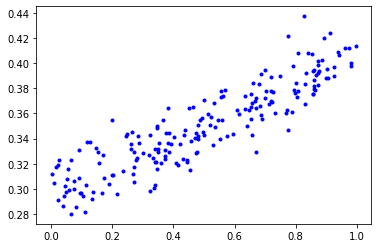

In [0]:
def make_dataset():
  x = tf.random.uniform(shape=(200,))
  noise = tf.random.normal(shape=(x.shape[0],), stddev=0.015)
  y = 0.1 * x + 0.3 + noise
  return x, y

x_train, y_train = make_dataset()

import matplotlib.pyplot as plt
plt.plot(x_train, y_train, 'b.')

Since our model is just a single line, we need two variables for it: one for the slope and one for the interceptor. 

In [0]:
m = tf.Variable(0.)
b = tf.Variable(0.)

Define the model:

In [0]:
def model(x):
  y = m * x + b
  return y

We will define the cost function as a squared difference between the real and predicted output 

In [0]:
def loss_fn(y_true, y_pred):
  return tf.math.reduce_mean(tf.square(y_true - y_pred))

print("Initial loss", loss_fn(y_train, model(x_train)).numpy())

Initial loss 0.12345044


And our training loop:

In [0]:
lr = 0.05

def train_one_step(x, y):
  with tf.GradientTape() as g:
    preds = model(x)
    loss = loss_fn(y, preds)

  g_m, g_b = g.gradient(loss, [m, b])
  
  m.assign_sub(g_m * lr)
  b.assign_sub(g_b * lr)

  return loss.numpy()

In [0]:
steps = 200

def train():
  # reset variables' value
  m.assign(0.)
  b.assign(0.)

  # train
  for i in range(steps):
    loss = train_one_step(x_train, y_train)
    if i % 20 == 0:
      print('Step', i ,'Loss:', loss)

def plot():
  plt.plot(x_train, y_train, 'b.')
  plt.plot(x_train, model(x_train))

Step 0 Loss: 0.12345044
Step 20 Loss: 0.00085954135
Step 40 Loss: 0.00028783825
Step 60 Loss: 0.00027194264
Step 80 Loss: 0.000261465
Step 100 Loss: 0.00025328167
Step 120 Loss: 0.00024688346
Step 140 Loss: 0.00024188071
Step 160 Loss: 0.00023796929
Step 180 Loss: 0.00023491096


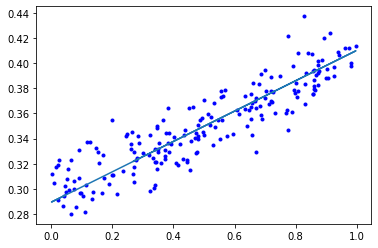

In [0]:
train()
plot()

Now lets use a higher-level API to calculate and apply gradients: Optimizers!

In [0]:
from tensorflow.keras import optimizers
optimizer = optimizers.Adam(learning_rate=lr)

def train_one_step(x, y):
  with tf.GradientTape() as g:
    preds = model(x)
    loss = loss_fn(y, preds)

  grads = g.gradient(loss, [m, b])
  optimizer.apply_gradients(zip(grads, [m, b]))

  return loss.numpy()

Step 0 Loss: 0.12345044
Step 20 Loss: 0.0042754835
Step 40 Loss: 0.0003351911
Step 60 Loss: 0.00028648187
Step 80 Loss: 0.00023145866
Step 100 Loss: 0.00022398174
Step 120 Loss: 0.00022411771
Step 140 Loss: 0.00022398097
Step 160 Loss: 0.0002239499
Step 180 Loss: 0.00022394929


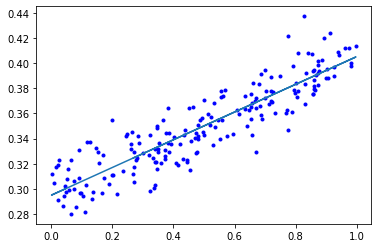

In [0]:
train()
plot()

## Final Assignment: Low-level MNIST CNN-Classifier

---



You probably have implemented a neural network-based classifier many times. However, we want to implement a multi-layer CNN classifier using raw TensorFlow operations and matrix multiplication. No pre-defined CNN blocks are allowed. You cannot use Keras, Keras Sequence API, or its training loop. Instead, you should implement the training loop yourself.

Assignment criteria:

*   Implement a multi-layer CNN classifer
*   Default Keras CNN modules are not permited
*   Use `tf.GradientTape` to build your custom training loop

*Hint: You may refer to [here](https://medium.com/@_init_/an-illustrated-explanation-of-performing-2d-convolutions-using-matrix-multiplications-1e8de8cd2544) to rewrite 2D Convolutions in terms of matrix multiplications.*

In [0]:
# Put your answer here

## References


---





*   Broadcasting in Python https://www.youtube.com/watch?v=tKcLaGdvabM
*   https://colab.research.google.com/notebooks/mlcc/creating_and_manipulating_tensors.ipynb#scrollTo=ocwT0iXH-nhT
*   https://tensorflow.org
*   http://web.stanford.edu/class/cs20si/

